Ett företag spenderar pengar på olika reklam: TV, radio och tidningar.

Uppgift:
Föreslå reklam streategi för att öka försäljningen
Använd linjär regression för att förutse försäljning baserat på olika investeringar på olika reklam områden.

In [2]:
import pandas as pd

df = pd.read_csv("Advertising.csv", index_col=0)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


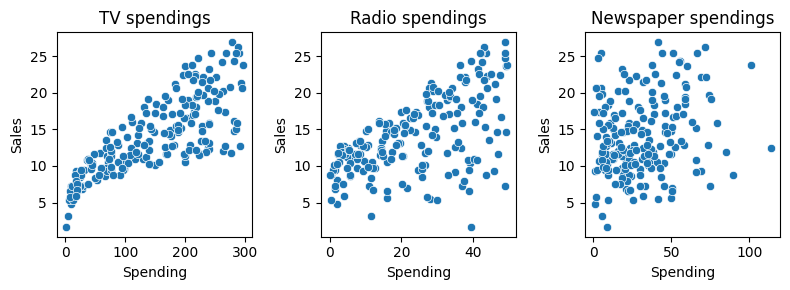

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
""" Då det är Sales som är målvariabeln som är placerad som den sista kolumnen i setet så exkluderar vi den i en variabel, number_features får värdet 3 """
number_features = df.shape[1] - 1 

""" Skapar en subplot, en för varje feature, exkluderad Sales så klart """
fig, ax = plt.subplots(1, number_features, figsize=(8, 3), dpi=100)

""" Loopar igenom alla features utan Sales (df.columns[:.-1]) """
for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y="Sales", ax=ax[i]) # Plottar en scatterplot för varje features mot Sales
    ax[i].set(xlabel="Spending", title=f"{feature} spendings") # Sätter axel labels och titlar
fig.tight_layout() # Justerar layouten för att förhindra överlappning


In [6]:
number_features

3

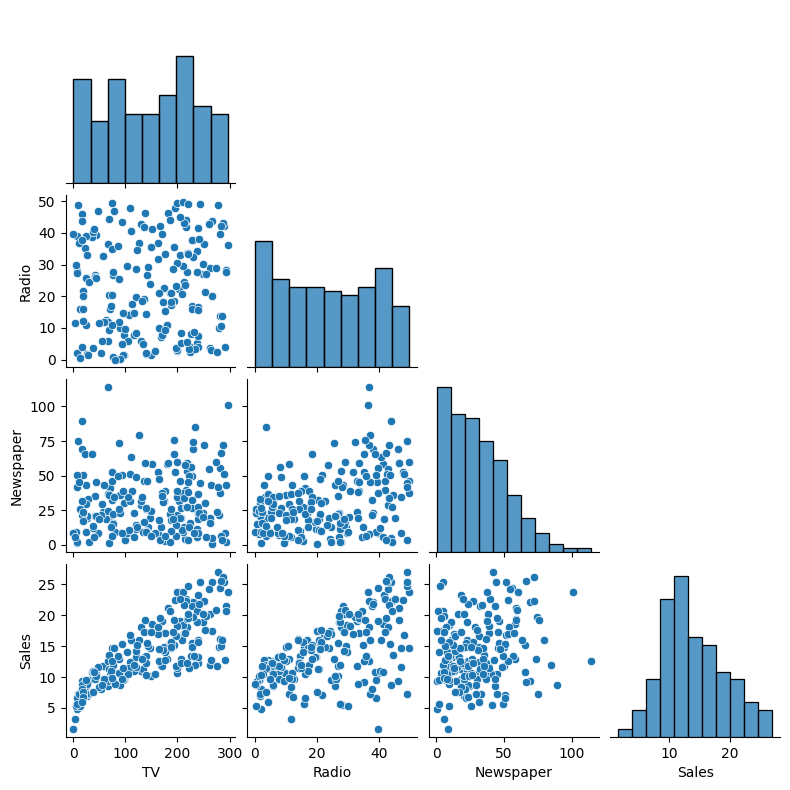

In [ ]:
# Plottar relationerna parvis från df
# Sätter corner till True för att skippa speglingen som annars kommer uppe mot höger för att spara beräkningstid
ax = sns.pairplot(df, corner=True, height=2)


### Enkel linjär regression

Linjär regression är en supervised learning algoritm, den föörutspådda outputen är kontinuerlig. När man har en feature eller en prediktor variabel kallas den för enkel linjär regression. 

$y \approx \beta_0 + \beta_1X$,

Där X är prediktor variabeln, y är respons varibeln, $\beta_0$ är intercept och $\beta_1$ är slopen, $\beta_0$ och $\beta_1$ är okända parameters som behöver estimeras med datapunkterna $(x_1, y_1), (x_2, y_2), \ldots, (x_n,y_n)$.

Exempel:
- y - Sales,
- X - TV investeringar ser ut att vara mer samlad för en linje när man kollar på scatterplottsen.

Man använder datapunkterna för att få ett stickprovs estimering $\hat{\beta}_0$, genom att använda minsta kvadrat estimering, som är den mest använda metoden. Då får man en prediktion av y då $\hat{y} = \hat{\beta}_0+\hat{\beta}_1x$, vilket är en linje som är så nära punkterna som möjligt.

Intercept beta0: 7.0326
Intercept beta1: 0.0475 Spenderade $1000 ger 47.5 extra sålda enheter


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

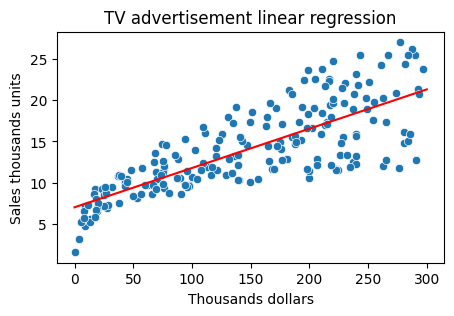

In [ ]:
import numpy as np

X, y = df["TV"], df["Sales"]

"""
Den här funktionen från numpy passerar ett polynom av grad 1 (en rak linje) till data. 
Detta görs genom att använda en metod som kallas minsta kvardatmetoden, 
som syftar till att minimera avståndet mellan datapunkterna och den linje som anpassas 

deg=1 anger att vi passar ett polynom av grad 1, vilket motsvarar en linjär regression. 
Om du hade satt deg=2 skulle det passa ett andragradspolynom, vilket ger en kurva istället för en rak linje.

Nedan syntax returnerar koefficienten för polynomet. Eftersom vi passa ett polynom av grad 1 får vi värderna:
beta_1 Lutningen (hur förändringen i TV-utgifter påverkar försäljningen).
beta_0 Interceptet (den grundläggande försäljningen när TV-utgifterna är noll)
"""
beta_1, beta_0 = np.polyfit(X, y, deg=1)

"""
Nedan syntas skapar en anonym funktion (en lambda funktion) som tar ett argument x.
En lambda funktion är ett snabbt sätt att skapa en funktion utan att behöva ge den ett namn.
Detta är själva uttrycket för den linjära modellen. Den representerar ekvationen för den räta linjen.
beta_0: interceptet ( där linjen skär y axeln)
beta_1: lutningen (hur mycket y förändras när x förändras)

Så den här lambda funktionen returnerar förutsägelsen y_hat för ett givet värde x, där x är den oberoende variabeln (TV utgift),
och y_hat är den förväntade försäljningen (Sales)
"""
y_hat = lambda x: beta_0 + beta_1 * x

print(f"Intercept beta0: {beta_0:.4f}")
print(f"Intercept beta1: {beta_1:.4f} Spenderade $1000 ger 47.5 extra sålda enheter") # Spenderade $1000 ger 47.5 extra sålda enheter

spend = np.linspace(0, 300) # Skapar en array med jämt fördelade värden mellan två angivna gränser. Används senare till x axeln. 

fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(
    title="TV advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units",
)


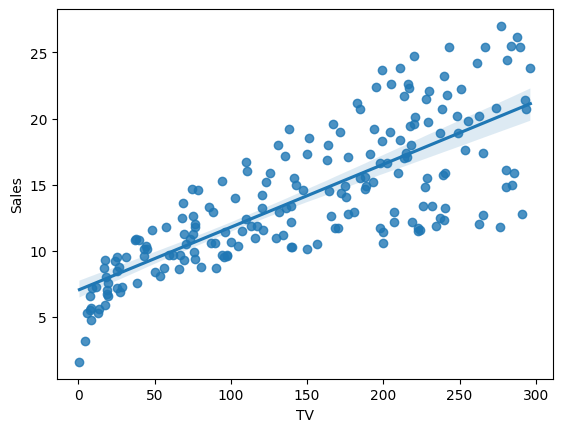

In [20]:
sns.regplot(x=X, y=y); # Snabbare metod än övre metod.

## Multipel linjär regression

Vi använde polyfit för att estimera $\hat\beta_0, \hat\beta_1$ från enbart TV variabeln. Polyfit behöver 1D men vi vill använda alla features (TV, radio, tidning) för en prediktion. Vi vill använda mer förklarande variabler. En sätt är att manuellt lösa normalekvationen eller den slutna formeln $\hat{\bf{\beta}} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T\bf{y}$ som vi har gjort tidigare i linjär algebra, men nu använder vi fler features som igentligen bar är fler kolumne.

Där $\bf{X} = 	\begin{bmatrix} 
	1 & x_1^{(1)} & x_2^{(1)}& \ldots &x_n^{(1)} \\
	1 & x_1^{(2)} & x_2^{(2)}& \ldots &x_n^{(2)}\\
	\vdots & \vdots & \vdots & \ldots & \vdots\\
	1 & x_1^{(m)}& x_2^{(m)}& \ldots &x_n^{(m)}
\end{bmatrix}, \bf{y} = \begin{bmatrix} 
y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}, \hat{\bf{\beta}} = \begin{bmatrix} 
\hat\beta_0 \\\hat\beta_1\\ \vdots \\ \hat\beta_n
\end{bmatrix}$

I vårt exempel har vi n = 3 features, m = 200 datapunkter vilket ger oss regressions koeffisenterna $\hat\beta_0, \hat\beta_1, \hat\beta_2, \hat\beta_3$.

Regressions linjen är $y = \hat\beta_0 + \hat\beta_1x_1 + \hat\beta_2x_2 + \hat\beta_3x_3$. Med den här ekvationen kan vi förutspå försäljningen för ett nya datapunkter $i$ genom $\hat{y}^{(i)} = \hat\beta_0 + \hat\beta_1x_1^{(i)} + \hat\beta_2x_2^{(i)} + \hat\beta_3x_3^{(i)}$ eller genom att använda punkt produkten $\hat{y}_i = \hat{\beta}\cdot\bf{x}^{(i)}$, där $\bf{x}^{(i)}$ = $[1, x_1^{(i)}, x_2^{(i)},x_3^{(i)} ]^T$.

In [ ]:
# Multipel linjär regression.
from sklearn.linear_model import LinearRegression

X, y = df.drop("Sales", axis="columns"), df["Sales"] # Vi tar bort Sales i X och lägger till Sales i y
 # Lägger till en kolumn på första plats och tilger den alla värden 1

model = LinearRegression()

""" Nedan metod används för att träna modellen med hjälp av de data som ges i X och y. 
Den beräknar de optimala koefficienterna (betavärdena) för modellen, 
som minimerar skillnaden mellan de förutsagda värderna och de faktiska värderna i y.
Efter att modellen hat tränats, innehåller beta de beräknade koefficienterna för de förklarade variablerna samt interceptet. """
beta = model.fit(X,y) 

print(beta.coef_)
print(beta.score(X,y))

test_sample = [1, 230.1, 37.8, 69.2] # Notera att vi la till 1 för interceptet. 

""" Här försöker vi göra en förutsägelse för ovan variabel test_samaple baserat på de kofficienter som beräknades av modellen, 
som finns i beta_hat. """
y_hat = model.predict([test_sample])

"""Notera att vi har tagit det första provet från data för att se om den förutsagda försäljningen kommer nära 22.1, för kontroll.
Notera att vi faktiskt inte borde använda ett prov från träningsdatan för testningen på grund av data läckage."""
print(f"TV: $230k, Radio: $37k, Newspaper: $69.2k predicts {y_hat[0]:.1f} thousand units.")

[ 0.          0.04576465  0.18853002 -0.00103749]
0.8972106381789521
TV: $230k, Radio: $37k, Newspaper: $69.2k predicts 20.5 thousand units.


c:\Users\emil_\git\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---
## Train-test split

Hur bra presterade modellen? Det finns flera utvärderingsmått som vi kan använda för att besvara denna fråga, men inte på träningsdatan. Om vi använder träningsdata för utvärdering har vi data läckage, eftersom vi vid förutsägningstillfället inte borde ha denna data tillgänglig. Data läckage kommer att leda till en överdriven uppskattning av modellens prestanda, eftersom modellen redan har tränat på den data den använder för utvärdering.

Vi delar upp datan i en träningsuppsättning och en testuppsättning, där testuppsättningen endast används vid utvärdering av modellen. Praktiskt sett väljer vi slumpmässigt denna uppsättning utan ersättning med en viss storlek för träningsuppsättningen och resten för testuppsättningen.

In [ ]:
train_fraction = int(len(df)*0.7) # split 70% till training och 30% till test

"""n= train_fraction anger antal rader som ska väljas, 
random_state=42 ger samma resultat varje gång"""
train = df.sample(n=train_fraction, random_state=42, replace=False)

"""Här tas alla rader som finns i träningsuppsättningen (dvs de rader som valdes bort tidigare) bort från df """
val = df.drop(train.index) 

"""Träningsdatan delas upp i två delar.
X_train kommer att vara en DataFrame som innehåller alla kolumner från train utom "Sales".
y_train kommer att vara en Series som enbart innehåller kolumnen "Sales" från train och representerar de faktiska
försäljningsvärdena som vi försöker förutsäga."""
X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]

"""Här delar vi upp valideringsdatan (val) på samma sätt som vi gjorde med träningsdatan
X_val: De oberoende variablerna (funktionerna) för validering.
y_val: Den beroende variabeln (målvärdet), som är försäljningen, i validering. """
X_val, y_val = val.drop("Sales", axis="columns"), val["Sales"]

X_train.insert(0, "Intercept", 1)
X_val.insert(0, "Intercept", 1)

for dataset in ["X_train", "X_val", "y_val", "y_val"]:
    print(f"shape of {dataset}: {eval(dataset).shape}")

shape of X_train: (140, 4)
shape of X_val: (60, 4)
shape of y_val: (60,)
shape of y_val: (60,)


In [ ]:
"""LinearRegression(): Detta skapar en instans av linjär regressionsmodellen från scikit-learn. 
Denna modell används för att lära sig sambandet mellan de oberoende variablerna (de funktioner som finns i X_train) och 
den beroende variabeln (målvärdet i y_train, t.ex. försäljning) """
model = LinearRegression()

"""fit(): Denna metod tränar modellen. När vi anropar model.fit(X_train, y_train), 
använder modellen X_train (de oberoende variablerna i träningsdatan) och y_train (målvariabeln i träningsdatan) för 
att hitta de bästa koefficienterna som beskriver sambandet mellan funktionerna och målvärdet."""
model.fit(X_train, y_train)

"""
Vi skapar en instans av en linjär regressionsmodell.
Vi tränar modellen på träningsdatan genom att använda X_train och y_train.
När fit() har körts, kommer modellen att ha lärt sig sambandet mellan funktionerna och målvärdet, 
och vi kan använda modellen för att göra förutsägelser på andra data.
 """

LinearRegression()

In [24]:
n = len(y_val)

y_hat = model.predict(X_val)

MAE = np.divide(1, n) * np.sum(np.abs(y_val - y_hat))
MSE = np.divide(1, n) * np.sum(np.square(y_val - y_hat))
RMSE = np.sqrt(MSE)
RSE = np.sqrt(np.divide(1, n-X_val.shape[1]-2) * np.sum(np.square(y_val - y_hat))) # bra om man har stora stickprov

# MAE, MSE, RMSE, RSE

for metric in [
    ("Mean absolute error", "MAE", "k units"),
    ("Mean squared error", "MSE", "M units"),  
    ("Root mean square error", "RMSE", "k units"),
]:
    print(f"{metric[0]}: {eval(metric[1]):.2f}{metric[2]}")



Mean absolute error: 1.32k units
Mean squared error: 3.54M units
Root mean square error: 1.88k units
